In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 8

In [ ]:
dataset = pd.read_csv("/content/PJME_hourly.csv")
dataset['Datetime'] = pd.to_datetime(dataset['Datetime'], infer_datetime_format=True)
indexedDataset = dataset.set_index(['Datetime'])

In [ ]:
from datetime import datetime
indexedDataset.head(10)

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0
2002-12-31 06:00:00,26222.0
2002-12-31 07:00:00,28702.0
2002-12-31 08:00:00,30698.0
2002-12-31 09:00:00,31800.0


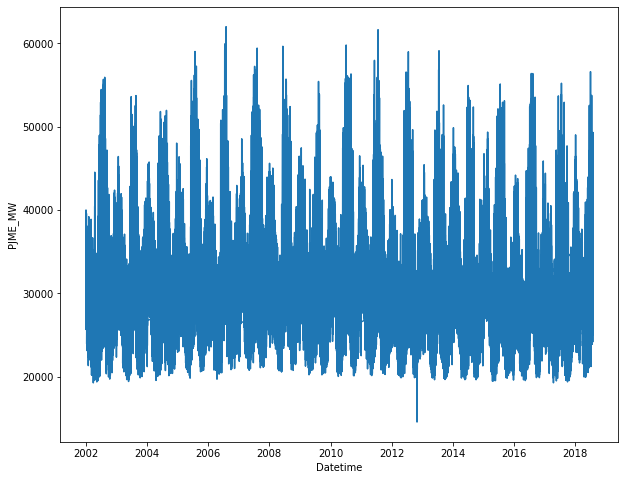

In [ ]:
## plot graph
plt.xlabel("Datetime")
plt.ylabel("PJME_MW")
plt.plot(indexedDataset)

In [ ]:
#Determing rolling statictics
rolmean = indexedDataset.rolling(window=8760).mean()
rolstd= indexedDataset.rolling(window=8760).std()
print(rolmean, rolstd)

                          PJME_MW
Datetime                         
2002-12-31 01:00:00           NaN
2002-12-31 02:00:00           NaN
2002-12-31 03:00:00           NaN
2002-12-31 04:00:00           NaN
2002-12-31 05:00:00           NaN
...                           ...
2018-01-01 20:00:00  30708.802968
2018-01-01 21:00:00  30709.856963
2018-01-01 22:00:00  30710.863699
2018-01-01 23:00:00  30711.683105
2018-01-02 00:00:00  30712.422260

[145366 rows x 1 columns]                          PJME_MW
Datetime                        
2002-12-31 01:00:00          NaN
2002-12-31 02:00:00          NaN
2002-12-31 03:00:00          NaN
2002-12-31 04:00:00          NaN
2002-12-31 05:00:00          NaN
...                          ...
2018-01-01 20:00:00  5803.352051
2018-01-01 21:00:00  5804.882189
2018-01-01 22:00:00  5806.145131
2018-01-01 23:00:00  5806.972699
2018-01-02 00:00:00  5807.565699

[145366 rows x 1 columns]


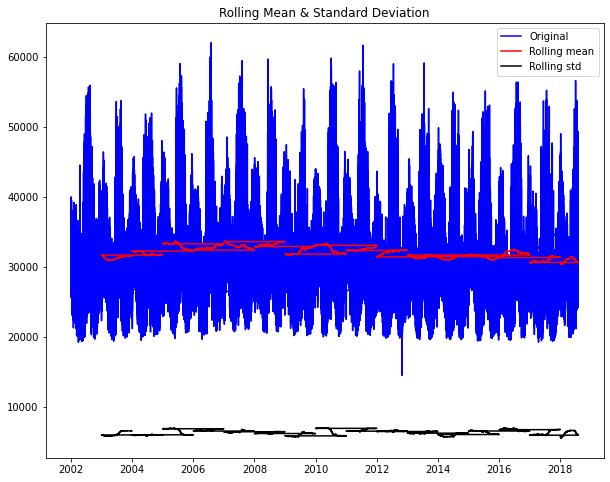

In [ ]:
## plot rolling statics
orig= plt.plot(indexedDataset, color= 'blue', label= 'Original')
mean= plt.plot( rolmean, color='red', label='Rolling mean')
std= plt.plot( rolstd, color='black' , label= 'Rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)


In [ ]:
#perform Dicky-fuller test
from statsmodels.tsa.stattools import adfuller

print('result of Dicky-fuller test:')
dftest= adfuller(indexedDataset['PJME_MW'], autolag='AIC')

dfoutput= pd.Series(dftest[0:4], index=['Test statistics' , 'p value' ,'#Lags Used' , '#Number of observations Used'])
for key,value  in dftest[4].items():
  dfoutput['Critical Value (%s)' %key] = value
  
print(dfoutput)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


result of Dicky-fuller test:
Test statistics                -1.882891e+01
p value                         2.022125e-30
#Lags Used                      7.400000e+01
#Number of observations Used    1.452910e+05
Critical Value (1%)            -3.430395e+00
Critical Value (5%)            -2.861560e+00
Critical Value (10%)           -2.566781e+00
dtype: float64


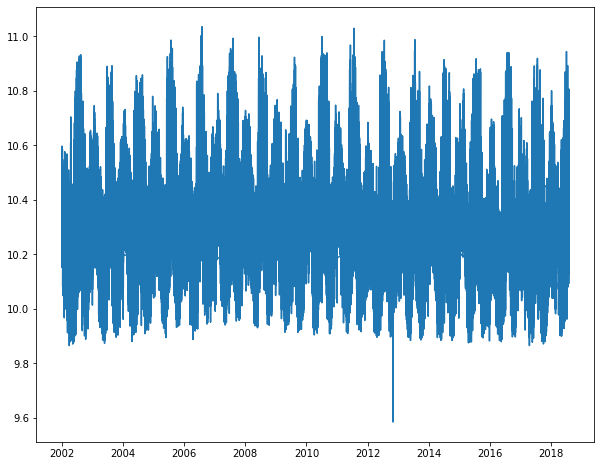

In [ ]:
#estimating Trend
indexedDataset_logScale= np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

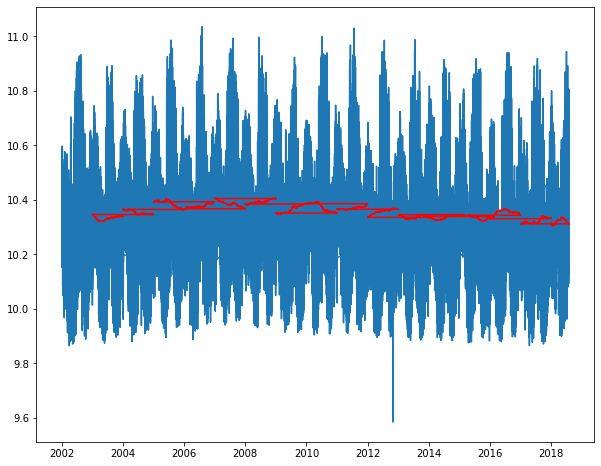

In [ ]:
movingAverage= indexedDataset_logScale.rolling(window=8760).mean()
movingSTD= indexedDataset_logScale.rolling(window=8760).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='red')

In [ ]:
datasetLogScaleMinusMovingAverage= indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(10)

#Removing NAN values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,PJME_MW
Datetime,
2003-12-31 02:00:00,-0.158447
2003-12-31 03:00:00,-0.177495
2003-12-31 04:00:00,-0.175840
2003-12-31 05:00:00,-0.149967
2003-12-31 06:00:00,-0.088279
2003-12-31 07:00:00,0.002987
2003-12-31 08:00:00,0.059650
2003-12-31 09:00:00,0.083920
2003-12-31 10:00:00,0.084534


In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

  #Determing  rolling statistics
  movingAverage= timeseries.rolling(window=8760).mean()
  movingSTD= timeseries.rolling(window=8760).std()

  # plot rolling statics
  orig= plt.plot(indexedDataset, color= 'blue', label= 'Original')
  mean= plt.plot( rolmean, color='red', label='Rolling mean')
  std= plt.plot( rolstd, color='black' , label= 'Rolling std')
  plt.legend(loc='best')
  plt.title('Rolling Mean & Standard Deviation')
  plt.show(block=False)

  #perform Dicky-fuller test
  from statsmodels.tsa.stattools import adfuller
  print('result of Dicky-fuller test:')
  dftest= adfuller(indexedDataset['PJME_MW'], autolag='AIC')
  dfoutput= pd.Series(dftest[0:4], index=['Test statistics' , 'p value' ,'#Lags Used' , '#Number of observations Used'])
  for key,value  in dftest[4].items():
      dfoutput['Critical Value (%s)' %key] = value
  print(dfoutput)

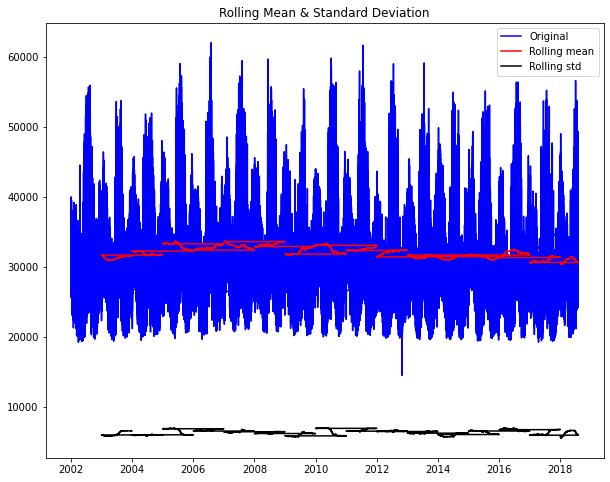

result of Dicky-fuller test:
Test statistics                -1.882891e+01
p value                         2.022125e-30
#Lags Used                      7.400000e+01
#Number of observations Used    1.452910e+05
Critical Value (1%)            -3.430395e+00
Critical Value (5%)            -2.861560e+00
Critical Value (10%)           -2.566781e+00
dtype: float64


In [ ]:
test_stationarity(datasetLogScaleMinusMovingAverage)

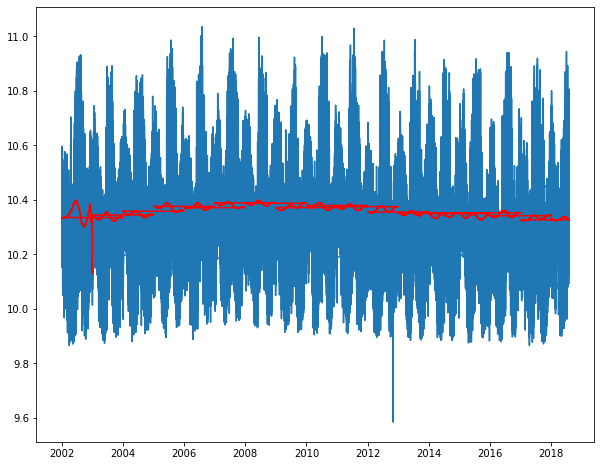

In [ ]:
exponentialDecayWeightedAverage= indexedDataset_logScale.ewm(halflife=8760, min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')

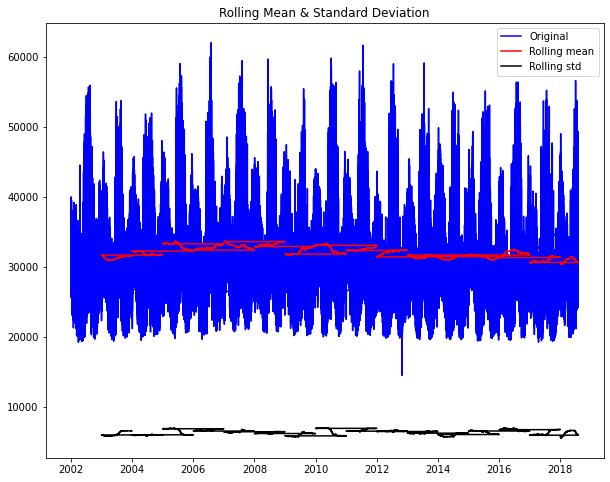

result of Dicky-fuller test:
Test statistics                -1.882891e+01
p value                         2.022125e-30
#Lags Used                      7.400000e+01
#Number of observations Used    1.452910e+05
Critical Value (1%)            -3.430395e+00
Critical Value (5%)            -2.861560e+00
Critical Value (10%)           -2.566781e+00
dtype: float64


In [ ]:
datasetLogScaleMinusMovingExponentialDecayAverage= indexedDataset_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

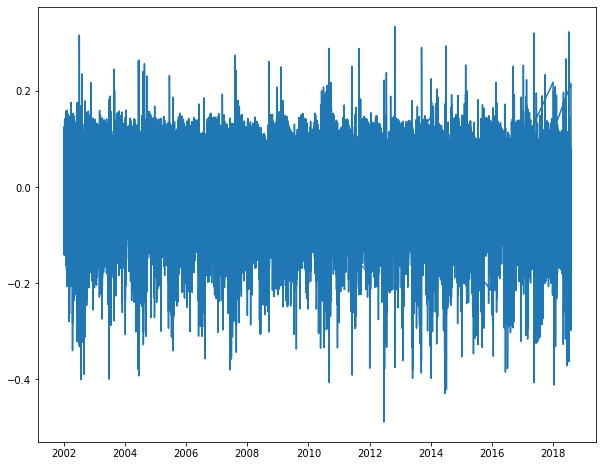

In [ ]:
datasetLogDiffShifting= indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

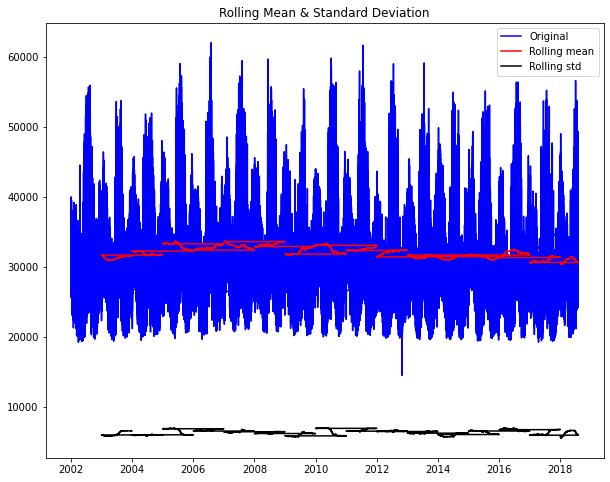

result of Dicky-fuller test:
Test statistics                -1.882891e+01
p value                         2.022125e-30
#Lags Used                      7.400000e+01
#Number of observations Used    1.452910e+05
Critical Value (1%)            -3.430395e+00
Critical Value (5%)            -2.861560e+00
Critical Value (10%)           -2.566781e+00
dtype: float64


In [ ]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

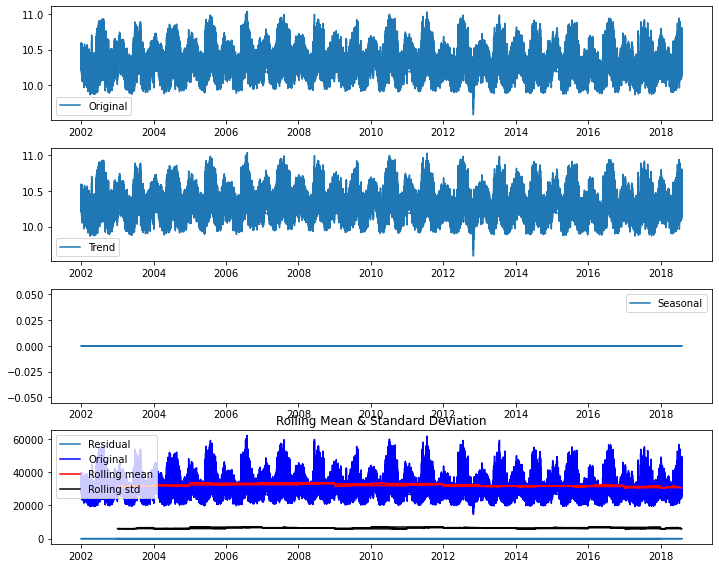

result of Dicky-fuller test:
Test statistics                -1.882891e+01
p value                         2.022125e-30
#Lags Used                      7.400000e+01
#Number of observations Used    1.452910e+05
Critical Value (1%)            -3.430395e+00
Critical Value (5%)            -2.861560e+00
Critical Value (10%)           -2.566781e+00
dtype: float64


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logScale, freq=1)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='best')
plt.tight_layout()

decomposedLogData= residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

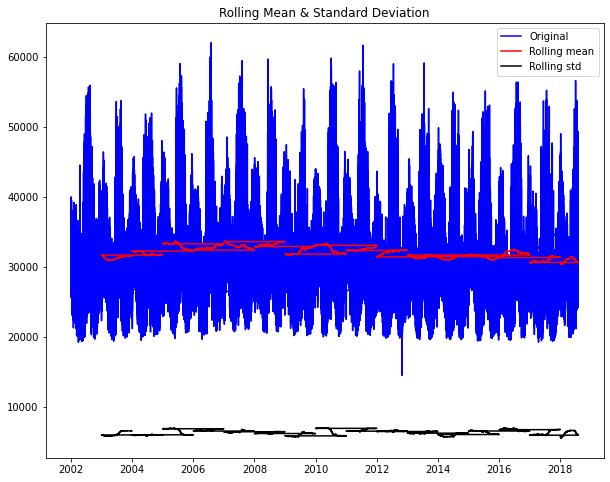

result of Dicky-fuller test:
Test statistics                -1.882891e+01
p value                         2.022125e-30
#Lags Used                      7.400000e+01
#Number of observations Used    1.452910e+05
Critical Value (1%)            -3.430395e+00
Critical Value (5%)            -2.861560e+00
Critical Value (10%)           -2.566781e+00
dtype: float64


In [ ]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData) 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


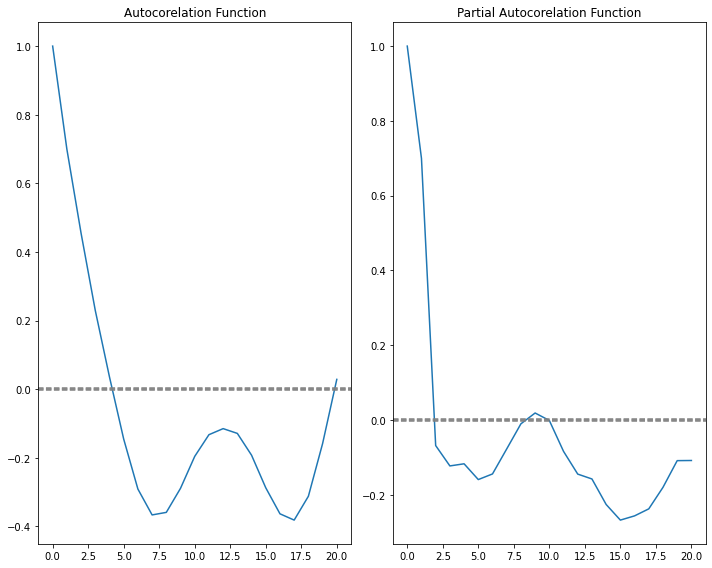

In [ ]:
#ACF and PACF plots
from statsmodels.tsa.stattools import acf, pacf
lag_acf= acf(datasetLogDiffShifting, nlags=20)
lag_pacf= pacf(datasetLogDiffShifting, nlags=20, method='ols')

#plot acf
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='grey')
plt.axhline(y=-0.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='grey')
plt.axhline(y=0.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='grey')
plt.title('Autocorelation Function')

#plot pacf
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='grey')
plt.axhline(y=-0.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='grey')
plt.axhline(y=0.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='grey')
plt.title('Partial Autocorelation Function')
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Plotting AR model


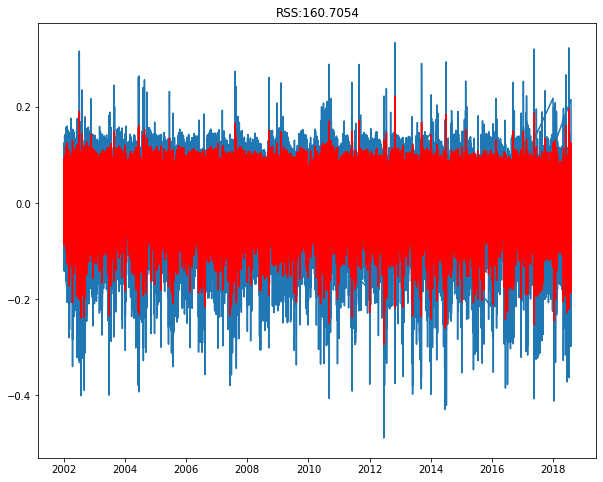

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

#AR model
model = ARIMA(indexedDataset_logScale, order=(2, 1, 5))
results_AR= model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS:%.4f'% sum((results_AR.fittedvalues-datasetLogDiffShifting["PJME_MW"]) **2))
print('Plotting AR model')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Plotting AR model


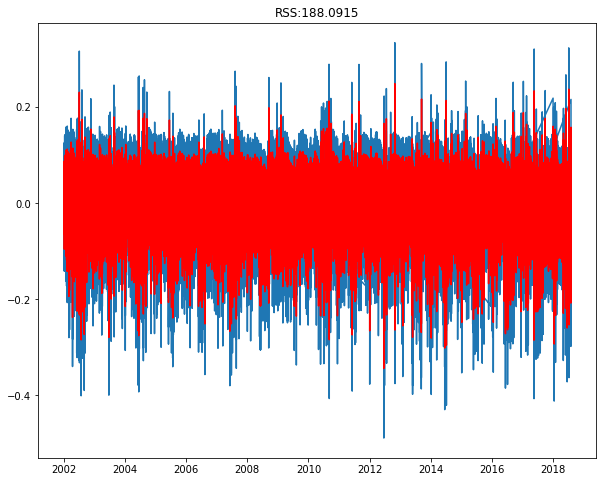

In [ ]:
#MA model
model = ARIMA(indexedDataset_logScale, order=(0, 1, 4))
results_MA= model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS:%.4f'% sum((results_MA.fittedvalues-datasetLogDiffShifting["PJME_MW"]) **2))
print('Plotting AR model')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Plotting AR model


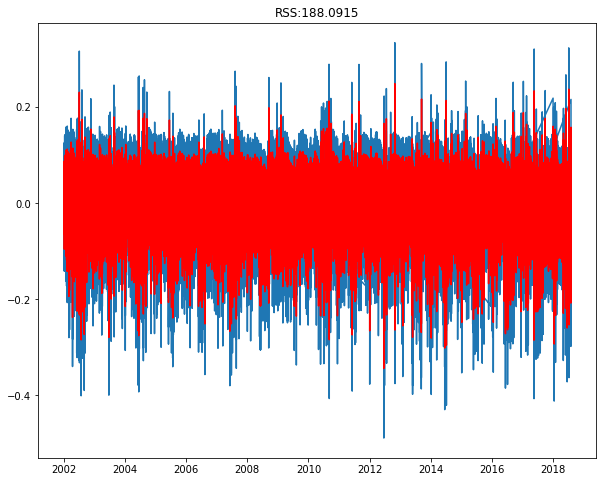

In [ ]:
#MA model
model = ARIMA(indexedDataset_logScale, order=(0, 1, 4))
results_MA= model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS:%.4f'% sum((results_MA.fittedvalues-datasetLogDiffShifting["PJME_MW"]) **2))
print('Plotting AR model')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5, 1.0, 'RSS:154.6983')

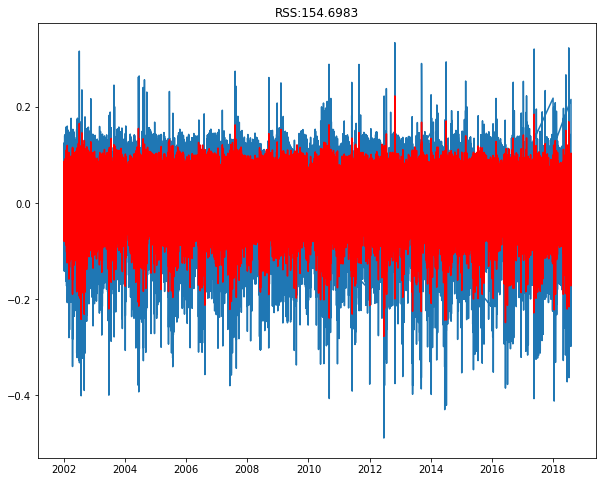

In [ ]:
model = ARIMA(indexedDataset_logScale, order=(2, 1, 4))
results_ARIMA= model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS:%.4f'% sum((results_ARIMA.fittedvalues-datasetLogDiffShifting["PJME_MW"]) **2))

In [ ]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Datetime
2002-12-31 02:00:00    0.000002
2002-12-31 03:00:00   -0.035778
2002-12-31 04:00:00   -0.012976
2002-12-31 05:00:00   -0.000455
2002-12-31 06:00:00    0.016065
dtype: float64


In [ ]:
#convert to cumulative sum
pridictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff.head())

Datetime
2002-12-31 02:00:00    0.000002
2002-12-31 03:00:00   -0.035778
2002-12-31 04:00:00   -0.012976
2002-12-31 05:00:00   -0.000455
2002-12-31 06:00:00    0.016065
dtype: float64


In [ ]:
predictions_ARIMA_log = pd.Series(indexedDataset_logScale['PJME_MW'], index=indexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(pridictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Datetime
2002-01-01 01:00:00    10.167327
2002-01-01 02:00:00    10.111840
2002-01-01 03:00:00    10.063791
2002-01-01 04:00:00    10.035093
2002-01-01 05:00:00    10.046524
dtype: float64

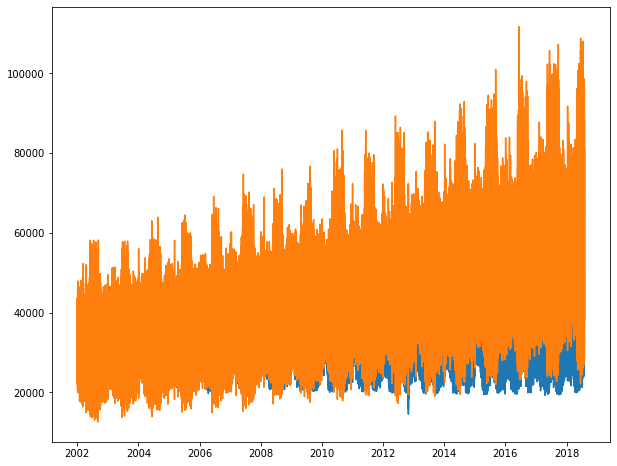

In [ ]:
predictions_ARIMA=np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)

In [ ]:
indexedDataset_logScale

,PJME_MW
Datetime,
2002-12-31 01:00:00,10.184825
2002-12-31 02:00:00,10.132494
2002-12-31 03:00:00,10.109444
2002-12-31 04:00:00,10.102051
2002-12-31 05:00:00,10.121015
...,...
2018-01-01 20:00:00,10.698379
2018-01-01 21:00:00,10.686270
2018-01-01 22:00:00,10.654951


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


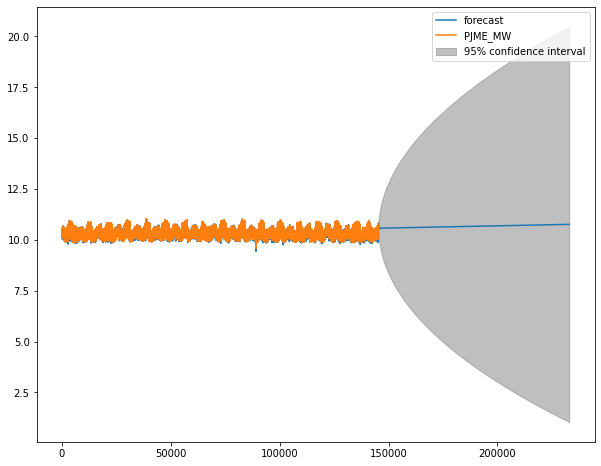

In [ ]:
results_ARIMA.plot_predict(1,232966)
x= results_ARIMA.forecast(steps=87600)

In [ ]:
x[1]

array([0.03262181, 0.05938089, 0.08140144, ..., 4.95898559, 4.95901388,
       4.95904216])

In [ ]:
len(x[1])

87600

In [ ]:
np.exp(x[1])

array([  1.03315974,   1.06117936,   1.08480629, ..., 142.4492211 ,
       142.45324996, 142.45727891])